<a href="https://colab.research.google.com/github/PDeySarkar103/SINP/blob/main/pytorch_basics_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN using pytorch


## Importing the basic packages

In [1]:
#Importing the general packages
import numpy as np
import matplotlib.pyplot as plt
import time

## Loading the MNIST data

In [2]:
#Importing packages for the dataset
import torchvision
import torchvision.datasets as datasets

In [3]:
mnist_dataset=datasets.MNIST(root='./data', download=True,transform=None)

In [4]:
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [5]:
data=mnist_dataset.data.numpy()

In [6]:
data.shape

(60000, 28, 28)

In [7]:
labels= mnist_dataset.targets.numpy()

In [8]:
labels

array([5, 0, 4, ..., 5, 6, 8])

labels:  5


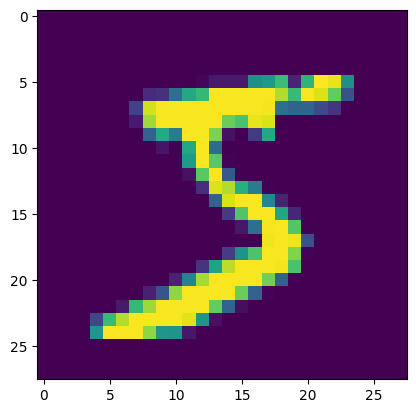

In [9]:
image=data[0].reshape([28,28])
print("labels: ",labels[0])
plt.imshow(image)

## One-hot encoding

In [10]:
#from sklearn.preprocessing import OneHotEncoder
#Initialize encoder
#encoder=OneHotEncoder(sparse_output=False,categories='auto')
#label=encoder.fit_transform(labels.reshape(-1,1))

In [11]:
#import torch
#labels=labels.astype(int)
#labels=labels.squeeze().long()
#labels=torch.tensor(labels, dtype=torch.long).squeeze()

## Splitting into training and testing dataset

In [12]:
data=data.reshape(-1,28*28) #Flattens the last image
labels=labels.reshape(-1)

In [13]:
data.shape

(60000, 784)

In [14]:
labels

array([5, 0, 4, ..., 5, 6, 8])

In [15]:
len(data)

60000

In [16]:
shuffle_indices=np.random.permutation(len(data))
data=data[shuffle_indices]
labels=labels[shuffle_indices]

In [17]:
#The size of training and vaildation data
train_size=int(0.7*data.shape[0])
valid_size=train_size+int(0.1*data.shape[0])
#The splitting
train_data=data[:train_size]
train_labels=labels[:train_size]
valid_data=data[train_size:valid_size]
valid_labels=labels[train_size:valid_size]
test_data=data[valid_size:]
test_labels=labels[valid_size:]

In [18]:
print(f'number of elements in data : training data : test data : validation data: {len(data)} : {len(train_data)} : {len(test_data)} : {len(valid_data)}')

number of elements in data : training data : test data : validation data: 60000 : 42000 : 12000 : 6000


In [19]:
train_data.shape

(42000, 784)

In [20]:
test_data.shape

(12000, 784)

In [21]:
valid_data.shape

(6000, 784)

In [22]:
valid_labels.shape

(6000,)

In [23]:
#train_data.reshape(42000,784,1)
#test_data.reshape(12000,784,1)
#valid_data.reshape(6000,784,1)

In [24]:
train_data.shape

(42000, 784)

In [25]:
test_data.shape

(12000, 784)

In [26]:
train_labels.reshape(-1,1)

array([[9],
       [9],
       [7],
       ...,
       [6],
       [9],
       [4]])

## Converting data into torch tensors

In [27]:
#Importing pytorch
import torch
from torch import Tensor

In [28]:
#Setting the device
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [29]:
#Converting to tensors
train_data=torch.tensor(train_data,dtype=torch.float).to(device)
test_data=torch.tensor(test_data,dtype=torch.float).to(device)
valid_data=torch.tensor(valid_data,dtype=torch.float).to(device)
train_labels=torch.tensor(train_labels,dtype=torch.long).to(device)
test_labels=torch.tensor(test_labels,dtype=torch.long).to(device)
valid_labels=torch.tensor(valid_labels,dtype=torch.long).to(device)

## Datasets and DataLoaders

In [30]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

### Using Dataset

In [31]:
#Using Dataset
class ClassifierDataset(Dataset):
  def __init__(self,
               data:torch.tensor,
               label:torch.tensor
               ): # The __init__ of ClassifierDataset daughter class returns Nothing
               super().__init__() # The __init__ method of the parent class 'Dataset' is called

               self.data=data
               self.label=label
               print("data size = {}".format(self.data.size()))
               print("target size = {}".format(self.label.size()))
  def __len__(self):
    return self.data.size()[0]
  def __getitem__(self,index):
    data=self.data[index]
    label=self.label[index]
    return data,label

In [32]:
training_dataclass=ClassifierDataset(data=train_data,label=train_labels)
testing_dataclass=ClassifierDataset(data=test_data,label=test_labels)
validation_dataclass=ClassifierDataset(data=valid_data,label=valid_labels)

data size = torch.Size([42000, 784])
target size = torch.Size([42000])
data size = torch.Size([12000, 784])
target size = torch.Size([12000])
data size = torch.Size([6000, 784])
target size = torch.Size([6000])


In [33]:
#type(training_dataclass)

### Using DataLoader

In [34]:
#Using DataLoader
batch_size=64
#Load training data
training_dataloader=DataLoader(training_dataclass,batch_size=batch_size,drop_last=False)
#Load testing data
testing_dataloader=DataLoader(testing_dataclass,batch_size=batch_size)
#Load validation data
validation_dataloader=DataLoader(validation_dataclass,batch_size=batch_size,drop_last=False)


In [35]:
training_dataloader.dataset[0]

(tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  

In [36]:
#type(training_dataloader)

## Developing the ANN

In [37]:
import torch.nn.functional as F
import torch.nn as nn

In [51]:
class DigitClassification(nn.Module):
  def __init__(self,input_dim,hidden_dim1,hidden_dim2,output_dim):
    self.input_dim=input_dim
    self.hidden_dim1=hidden_dim1
    self.hidden_dim2=hidden_dim2
    self.output_dim=output_dim

    super().__init__()

    self.layer1=nn.Linear(in_features=input_dim,out_features=hidden_dim1)
    self.layer2=nn.Linear(in_features=hidden_dim1,out_features=hidden_dim2)
    self.layer3=nn.Linear(in_features=hidden_dim2,out_features=output_dim)

    self.dropout=nn.Dropout(p=0.1)

  def forward(self, src: Tensor) -> Tensor:
    out1=self.layer1(src)
    out1=torch.nn.ReLU()(out1)
    out1=self.dropout(out1)
    out2=self.layer2(out1)
    out2=torch.nn.ReLU()(out2)
    out2=self.dropout(out2)
    out3=self.layer3(out2)
    out3=torch.nn.ReLU()(out3)
    out3=self.dropout(out3)
    out4=torch.nn.Softmax()(out3)

    return out4

In [53]:
model=DigitClassification(input_dim=28*28,hidden_dim1=256,hidden_dim2=128,output_dim=10)

In [54]:
model

DigitClassification(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [55]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.0001)
criterion=torch.nn.CrossEntropyLoss()


### Training and Validating the model

In [56]:
#Training
def train():
  model.train()
  total_loss=0

  for batch in training_dataloader: # Sends data from Dataloader in batches of 64
    optimizer.zero_grad() #Resets gradient values at each iteration
    out=model(batch[0])
    #print(out.shape)
    target=batch[1]
    #print(target.shape)
    loss=criterion(out,target)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
  return total_loss/len(training_dataloader)

In [57]:
#Validation
def validate():
  model.eval()
  total_loss=0
  with torch.no_grad():
    for batch in validation_dataloader:
      out=model(batch[0])
      target=batch[1]
      loss=criterion(out,target)
      total_loss += loss.item()
  return total_loss/len(validation_dataloader)

### Compiling the model

In [60]:
#epochs=500
epochs=100
train_losses=[]
val_losses=[]
for epoch in range(1,epochs+1):
  train_loss=train()
  val_loss=validate()
  train_losses.append(train_loss)
  val_losses.append(val_loss)
  print(f'Epoch : {epoch} \t Training Loss : {train_loss} \t Validation Loss : {val_loss}')

Epoch : 1 	 Training Loss : 1.8969285107094402 	 Validation Loss : 1.7695893784786791
Epoch : 2 	 Training Loss : 1.8547952665041572 	 Validation Loss : 1.7422250192216102
Epoch : 3 	 Training Loss : 1.8318322051424232 	 Validation Loss : 1.7225730723523078
Epoch : 4 	 Training Loss : 1.8190082587426475 	 Validation Loss : 1.7110050929353593
Epoch : 5 	 Training Loss : 1.805506492858608 	 Validation Loss : 1.7029790168112897
Epoch : 6 	 Training Loss : 1.7977266569297246 	 Validation Loss : 1.697289750931111
Epoch : 7 	 Training Loss : 1.7917534049424588 	 Validation Loss : 1.6914355742170455
Epoch : 8 	 Training Loss : 1.7849412944218883 	 Validation Loss : 1.68698040602055
Epoch : 9 	 Training Loss : 1.7761442768337883 	 Validation Loss : 1.682396429650327
Epoch : 10 	 Training Loss : 1.7762197085530065 	 Validation Loss : 1.6789798330753407
Epoch : 11 	 Training Loss : 1.7733282547563178 	 Validation Loss : 1.6762864399463573
Epoch : 12 	 Training Loss : 1.7671311010508777 	 Validat

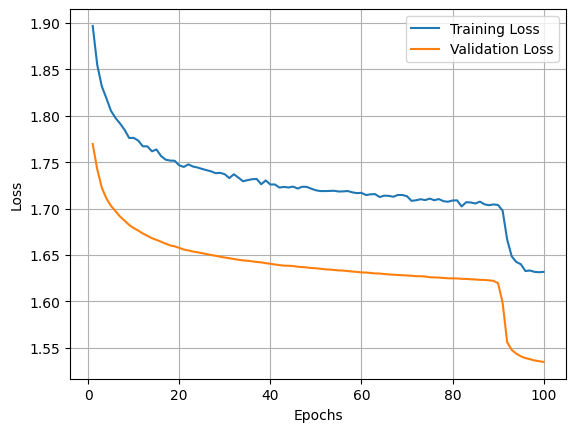

In [61]:
#Plotting the result
import matplotlib.pyplot as plt
plt.plot(range(1,len(val_losses)+1),train_losses,label='Training Loss')
plt.plot(range(1,len(val_losses)+1),val_losses,label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### Predictions

In [93]:
batch=testing_dataclass[1]

In [94]:
batch[0].shape

torch.Size([784])

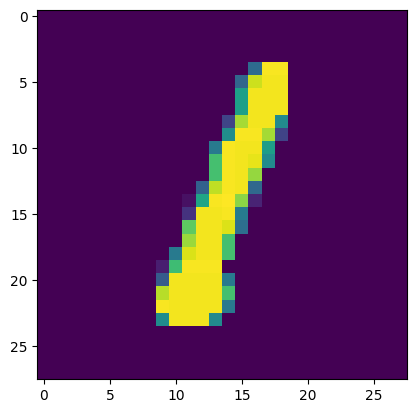

In [95]:
image=batch[0].cpu().numpy().reshape([28,28])
plt.imshow(image)

In [96]:
with torch.no_grad():
  pred=model(batch[0])

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [97]:
#out
torch.nn.Softmax()(pred)
torch.argmax(pred).item()

1

In [79]:
predictions=[]
target=[]
with torch.no_grad():
  for batch in testing_dataloader:
    out=model(batch[0]).cpu().numpy()
    labels=batch[1].cpu().numpy()
    predictions.extend(np.argmax(out,axis=1))
    target.extend(labels)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1775: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [83]:
target=np.array(target)
predictions=np.array(predictions)

In [84]:
target.shape

(12000,)

In [85]:
predictions.shape

(12000,)

## Visualizing model efficiency

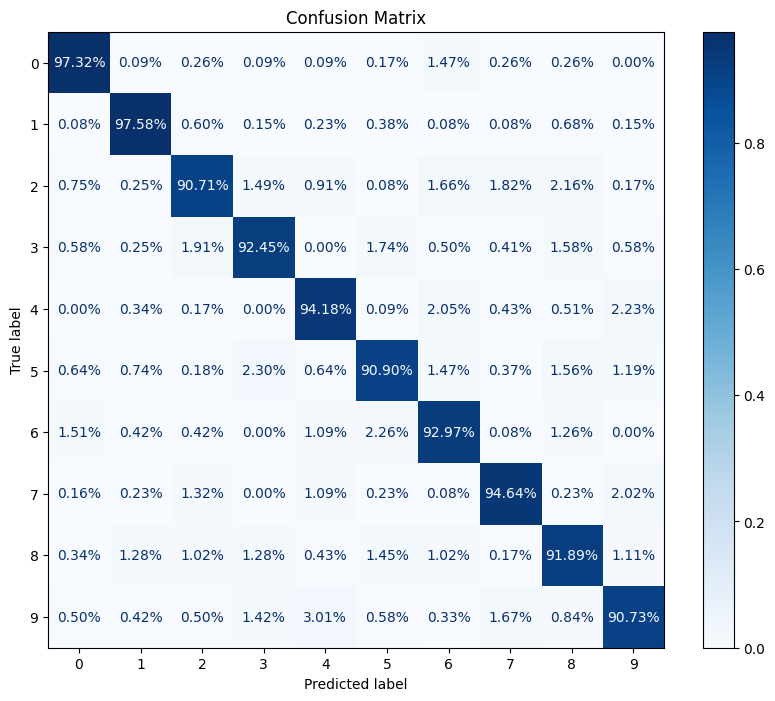

In [98]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
cm=confusion_matrix(target,predictions,normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='.2%',  ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

## Debugging

In [46]:
for X_batch, y_batch in training_dataloader:
    print("X:", X_batch.shape)
    print("Y:", y_batch.shape)
    break


X: torch.Size([64, 784])
Y: torch.Size([64])


In [47]:
for X_batch, y_batch in validation_dataloader:
    print("X:", X_batch.shape)
    print("Y:", y_batch.shape)
    break


X: torch.Size([64, 784])
Y: torch.Size([64])
